<h1 style="color:blue;font-weight:bold">Ahmed Naseem<br>Data Science with Artificial Intelligence<br>Batch 5<br>Exam: Deep Learning</h1>

<h2 style="color:green;font-weight:bold;font-style:italic">SECTION 3</h2>

In [1]:
!pip install kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ahmedcurious","key":"e2c882d9356b05f440f4a9433ebdf108"}'}

In [4]:
! chmod 600 /content/kaggle/kaggle.json

In [5]:
!kaggle datasets download -d aneesh10/cricket-shot-dataset

Dataset URL: https://www.kaggle.com/datasets/aneesh10/cricket-shot-dataset
License(s): unknown
 98% 633M/645M [00:08<00:00, 100MB/s] 
100% 645M/645M [00:08<00:00, 79.8MB/s]


In [6]:
!unzip cricket-shot-dataset.zip -d cricket_shots_dataset

Archive:  cricket-shot-dataset.zip
  inflating: cricket_shots_dataset/data/drive/drives1.png  
  inflating: cricket_shots_dataset/data/drive/drives10.png  
  inflating: cricket_shots_dataset/data/drive/drives100.png  
  inflating: cricket_shots_dataset/data/drive/drives1000.png  
  inflating: cricket_shots_dataset/data/drive/drives1001.png  
  inflating: cricket_shots_dataset/data/drive/drives1002.jpeg  
  inflating: cricket_shots_dataset/data/drive/drives1003.png  
  inflating: cricket_shots_dataset/data/drive/drives1004.png  
  inflating: cricket_shots_dataset/data/drive/drives1005.png  
  inflating: cricket_shots_dataset/data/drive/drives1006.png  
  inflating: cricket_shots_dataset/data/drive/drives1007.png  
  inflating: cricket_shots_dataset/data/drive/drives1008.jpeg  
  inflating: cricket_shots_dataset/data/drive/drives1009.png  
  inflating: cricket_shots_dataset/data/drive/drives101.png  
  inflating: cricket_shots_dataset/data/drive/drives1010.png  
  inflating: cricket_shot

In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import os
import random

In [15]:
train_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    '/content/cricket_shots_dataset/data/',
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical'
)


Found 4723 images belonging to 4 classes.


In [17]:
base_model = MobileNetV2(weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(4, activation='softmax')(x)  # Adjust the number of classes here

model = Model(inputs=base_model.input, outputs=x)


<ipython-input-17-018c705a894a>:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False)


In [18]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, None, None, 3)  │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, None, None, 32) │            864 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, None, None, 32) │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, None, None, 32) │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, None, None, 32) │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, None, None, 32) │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, None, None, 32) │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, None, None, 16) │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, None, None, 16) │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, None, None, 96) │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, None, None, 96) │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, None, None, 96) │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, None, None, 96) │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, None, None, 96) │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├──────────────────────

 Total params: 2,263,108 (8.63 MB)

 Trainable params: 2,228,996 (8.50 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [20]:
model.fit(train_generator, epochs=5)

Epoch 1/5
296/296 ━━━━━━━━━━━━━━━━━━━━ 142s 178ms/step - accuracy: 0.7591 - loss: 0.6385
Epoch 2/5
296/296 ━━━━━━━━━━━━━━━━━━━━ 39s 108ms/step - accuracy: 0.9307 - loss: 0.1938
Epoch 3/5
296/296 ━━━━━━━━━━━━━━━━━━━━ 33s 109ms/step - accuracy: 0.9479 - loss: 0.1448
Epoch 4/5
296/296 ━━━━━━━━━━━━━━━━━━━━ 33s 108ms/step - accuracy: 0.9648 - loss: 0.1116
Epoch 5/5
296/296 ━━━━━━━━━━━━━━━━━━━━ 32s 106ms/step - accuracy: 0.9665 - loss: 0.1034


In [21]:
def display_images_from_folder(folder, num_images=5):
    images = os.listdir(folder)
    random_images = random.sample(images, num_images)
    plt.figure(figsize=(15, 5))

    for i, img_name in enumerate(random_images):
        img_path = os.path.join(folder, img_name)
        img = plt.imread(img_path)
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(img_name)

    plt.show()

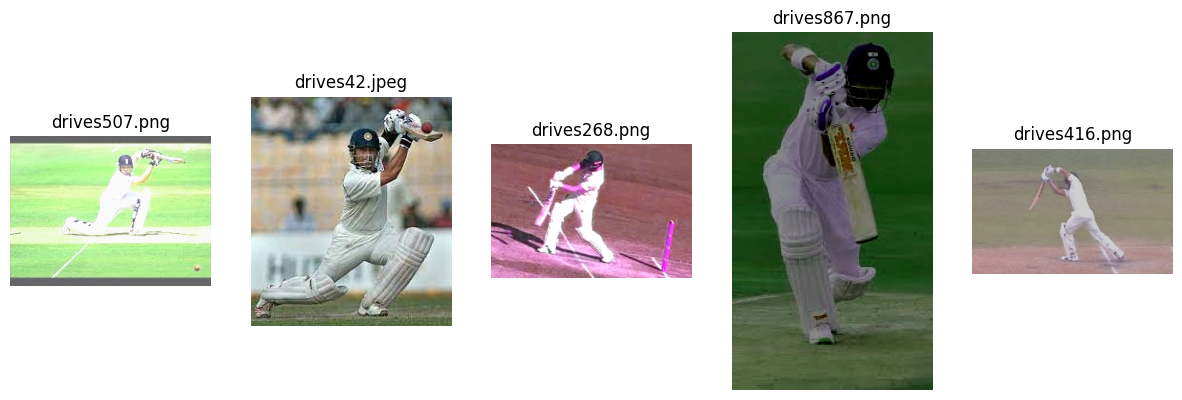

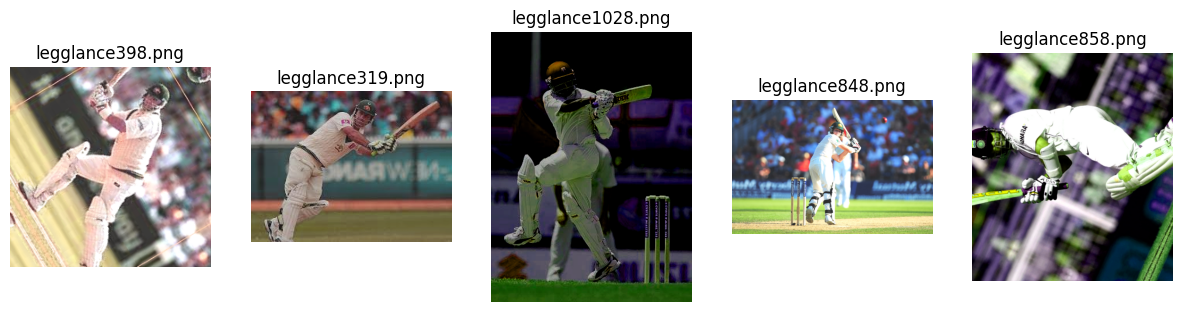

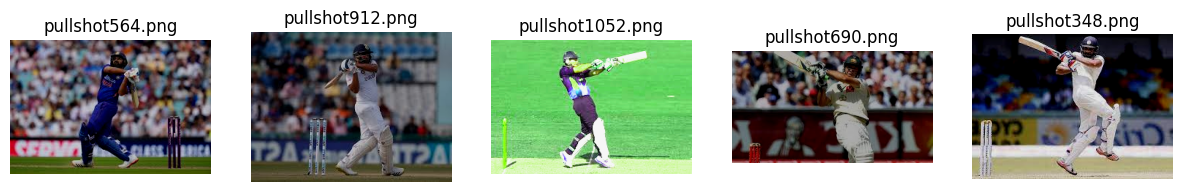

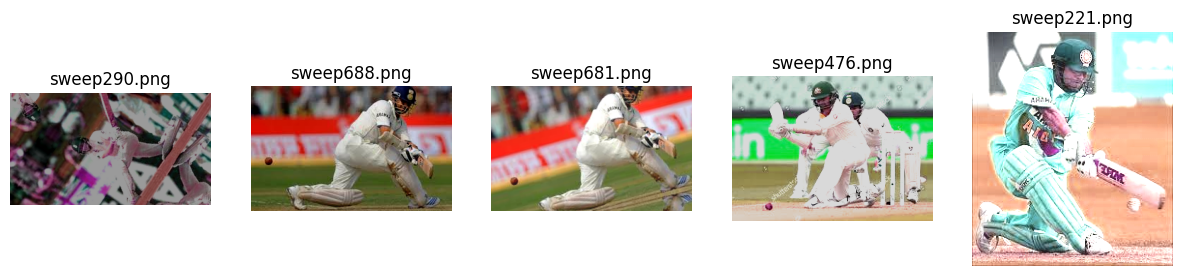

In [22]:
display_images_from_folder('/content/cricket_shots_dataset/data/drive', num_images=5)
display_images_from_folder('/content/cricket_shots_dataset/data/legglance-flick', num_images=5)
display_images_from_folder('/content/cricket_shots_dataset/data/pullshot', num_images=5)
display_images_from_folder('/content/cricket_shots_dataset/data/sweep', num_images=5)